In [6]:
import pandas as pd
import seaborn as sns
import glob

#### Collect all possible trace files

Build partition paths

In [7]:
partition_headers = ["test_suite", "test_name", "vm_lifespan", "vm_region", "vm_sku", "unit"]
paths = glob.glob("." + "/**/*.csv", recursive=True)
partitions_raw = [[part for part in parts if any(p in part for p in partition_headers)] for parts in [path.split("/") for path in paths]]
partitions = [[p.split("=")[1].split(".")[0] for p in parts] for parts in partitions_raw]

In [8]:
dataframes = []
for partition in partitions:
    df = pd.read_csv(f"./{'/'.join([f'{h}={v}' for h, v in zip(partition_headers, partition)])}.csv")
    for h, v in zip(partition_headers, partition):
        df[h] = v
    if len(df) > 0:
        dataframes.append(df)
data = pd.concat(dataframes)
data

,value,runtime,starttime,VM_id,test_suite,test_name,vm_lifespan,vm_region,vm_sku,unit
0,20569.70,85.26,2024-03-08 03:01:31.400,0,Flexible_IO_Tester,Type_Sequential_Write_-_IO_Engine_Linux_AIO_-_...,short,eastus,B8ms,msec
1,20573.68,85.31,2024-03-08 04:31:51.110,1,Flexible_IO_Tester,Type_Sequential_Write_-_IO_Engine_Linux_AIO_-_...,short,eastus,B8ms,msec
2,27986.13,85.33,2024-03-08 06:05:13.870,2,Flexible_IO_Tester,Type_Sequential_Write_-_IO_Engine_Linux_AIO_-_...,short,eastus,B8ms,msec
3,20588.04,85.28,2024-03-08 05:32:25.040,3,Flexible_IO_Tester,Type_Sequential_Write_-_IO_Engine_Linux_AIO_-_...,short,eastus,B8ms,msec
4,20571.85,85.35,2024-03-08 06:09:05.700,4,Flexible_IO_Tester,Type_Sequential_Write_-_IO_Engine_Linux_AIO_-_...,short,eastus,B8ms,msec
...,...,...,...,...,...,...,...,...,...,...
20724,77214.40,28.36,2024-09-18 04:51:13.080,2,Intel_Memory_Latency_Checker,Test_Peak_Injection_Bandwidth_-_Stream-Triad_Like,long,westus2,D8s_v5,MiB_s
20725,74921.40,28.63,2024-09-18 10:31:46.080,2,Intel_Memory_Latency_Checker,Test_Peak_Injection_Bandwidth_-_Stream-Triad_Like,long,westus2,D8s_v5,MiB_s
20726,76425.00,28.47,2024-09-18 16:55:06.150,2,Intel_Memory_Latency_Checker,Test_Peak_Injection_Bandwidth_-_Stream-Triad_Like,long,westus2,D8s_v5,MiB_s
20727,75300.80,28.46,2024-09-18 18:51:29.870,2,Intel_Memory_Latency_Checker,Test_Peak_Injection_Bandwidth_-_Stream-Triad_Like,long,westus2,D8s_v5,MiB_s


#### Summary of a test selecting for lifespan, region, and VM SKU comparing across instances

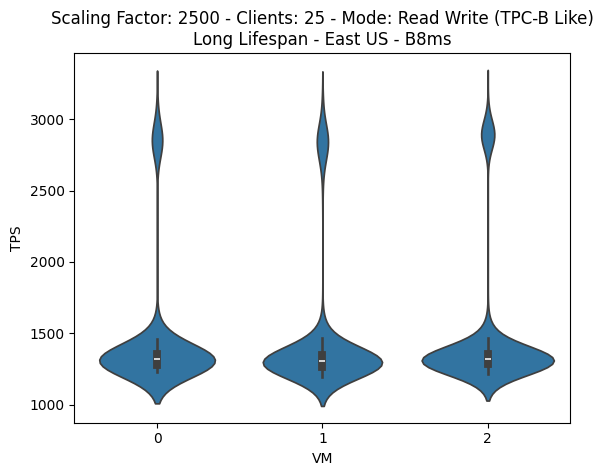

In [11]:
sns.violinplot(
    data[
        (data["test_suite"] == "PostgreSQL") & 
        (data["test_name"] == "Scaling_Factor_2500_-_Clients_25_-_Mode_Read_Write_(TPC-B_Like)") &
        (data["vm_lifespan"] == "long") &
        (data["vm_region"] == "eastus") &
        (data["vm_sku"] == "B8ms") &
        (data["unit"] == "TPS")
    ],
    y="value",
    x="VM_id"
).set(xlabel="VM", ylabel="TPS", title="Scaling Factor: 2500 - Clients: 25 - Mode: Read Write (TPC-B Like)\nLong Lifespan - East US - B8ms");

#### Summary of a test selecting for lifespan, and VM SKU comparing across regions

[Text(0.5, 0, 'Region'),
 Text(0, 0.5, 'TPS'),
 Text(0.5, 1.0, 'Scaling Factor: 2500 - Clients: 25 - Mode: Read Write (TPC-B Like)\nShort Lifespan - B8ms')]

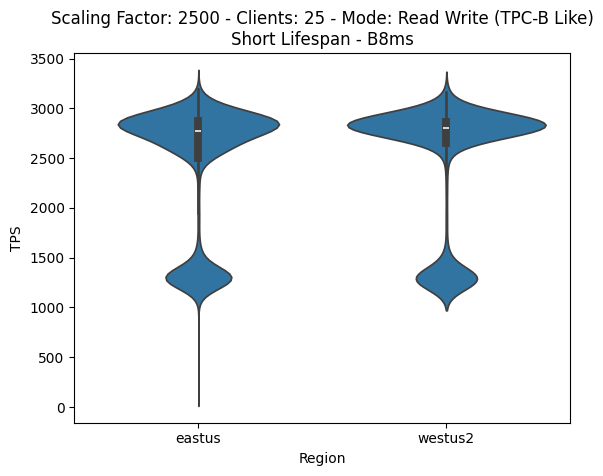

In [12]:
sns.violinplot(
    data[
        (data["test_suite"] == "PostgreSQL") & 
        (data["test_name"] == "Scaling_Factor_2500_-_Clients_25_-_Mode_Read_Write_(TPC-B_Like)") &
        (data["vm_lifespan"] == "short") &
        (data["vm_sku"] == "B8ms") &
        (data["unit"] == "TPS")
    ],
    y="value",
    x="vm_region"
).set(xlabel="Region", ylabel="TPS", title="Scaling Factor: 2500 - Clients: 25 - Mode: Read Write (TPC-B Like)\nShort Lifespan - B8ms")